In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

In [73]:
df = pd.read_csv("train.csv")

In [74]:
df.shape

(891, 12)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Missing and null value treatment.

In [77]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [79]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [80]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [81]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Cabin"].fillna("No cabin",inplace=True)
df["Embarked"].fillna('S',inplace=True)

In [82]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [83]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Univariate and Bivariate analysis with visualization and without visualization.

In [84]:
df["PassengerId"]=df["PassengerId"].astype(float)
df["Survived"]=df["Survived"].astype(float)
df["Pclass"]=df["Pclass"].astype(float)
df["SibSp"]=df["SibSp"].astype(float)
df["Parch"]=df["Parch"].astype(float)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [86]:
df_num = df.select_dtypes([int,float])
df_cat = df.select_dtypes(object)

In [87]:
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500


In [88]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,No cabin,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,No cabin,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,No cabin,S


In [89]:
## Univariate analysis.

df["Survived"].value_counts()
df["Survived"].value_counts(normalize=True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

In [90]:
df["Pclass"].value_counts(normalize=True)

3.0    0.551066
1.0    0.242424
2.0    0.206510
Name: Pclass, dtype: float64

In [91]:
df["Age"].mean()

29.699117647058763

In [92]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [93]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

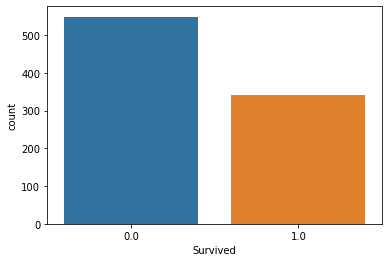

In [97]:
plt.figure()
sns.countplot(df["Survived"])
plt.show()

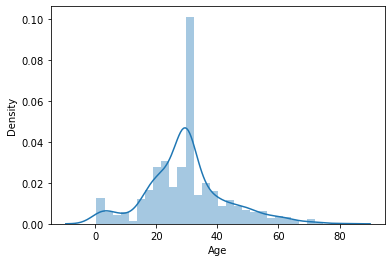

In [98]:
plt.figure()
sns.distplot(df["Age"])
plt.show()

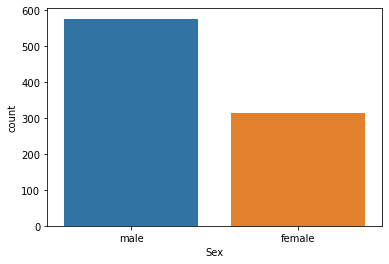

In [99]:
plt.figure()
sns.countplot(df["Sex"])
plt.show()

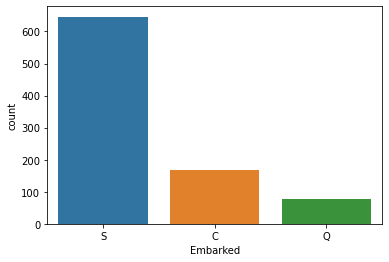

In [100]:
plt.figure()
sns.countplot(df["Embarked"])
plt.show()

In [101]:
# Bivariate EDA

Pclass_df = df.groupby('Pclass')["Survived"].mean() 

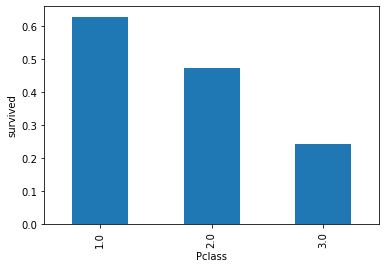

In [102]:
plt.figure()
Pclass_df.plot(kind="bar")
plt.ylabel("survived")
plt.show()

<li>Passengers on Pclass1 has a better survival rate of approx 60%.</li>
<li>Passengers on Pclass2 has a medium survival rate of approx 50%.</li>
<li>Passenger on Pclass3 has the Lowest survial rate of approx 22% - 25%</li>

In [105]:
survived_df = df.groupby("Sex")["Survived"].mean()

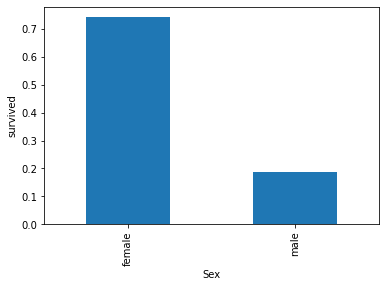

In [106]:
plt.figure()
survived_df.plot(kind="bar")
plt.ylabel("survived")
plt.show()

<li><b>As we can see that female survived rate is more than male survived rate.</b></li>

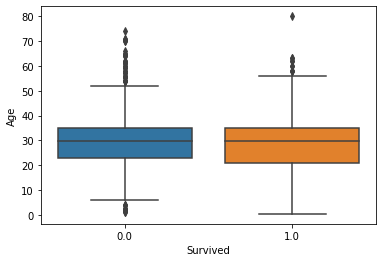

In [107]:
plt.figure()
sns.boxplot(x="Survived",y="Age",data=df)
plt.show()

### 3. How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r

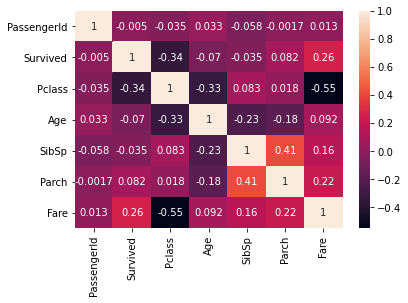

In [108]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

<li><b>From the above figure we can see that there is a positive correlation between Fare and Survived & also with parch and survived and there is negative correlation between survived and passenger id, age, sbsp </b></li>
<b><li>and there is Highly negative Correlation between Pclass and survived.</b></li>

### 4. Did Sex play a role in Survival ?

In [114]:
sex_role = df.groupby("Sex")["Survived"].mean()

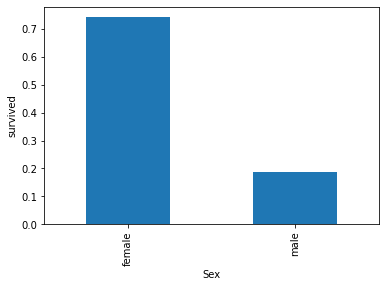

In [115]:
plt.figure()
sex_role.plot(kind="bar")
plt.ylabel("survived")
plt.show()

### 5. Did class played role in survival ?

In [116]:
class_role = df.groupby('Pclass')["Survived"].mean()

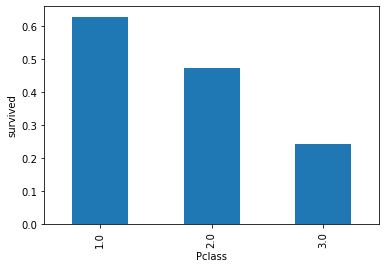

In [117]:
plt.figure()
class_role.plot(kind="bar")
plt.ylabel("survived")
plt.show()

### 6. How fare is related to Age, Class and Port of Embarkation ?

In [118]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,No cabin,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,No cabin,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,No cabin,S


In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
for col in df_cat["Embarked"]:
    le= LabelEncoder()
    df_cat["Embarked"] = le.fit_transform(df["Embarked"])

In [121]:
x=df_cat["Embarked"]

In [122]:
y=df["Fare"]

In [123]:
y.corr(x)

-0.22471936421957328

<AxesSubplot:xlabel='Embarked'>

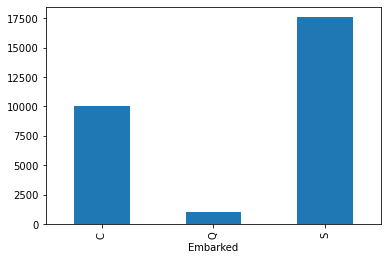

In [129]:
df.groupby('Embarked')["Fare"].sum().plot(kind="bar")

In [130]:
## Fare is negatively correlated with Embarked.

In [131]:
df["Fare"].corr(df["Pclass"])

-0.5494996199439078

In [132]:
## Fare is negatively correlated with Pclass.

In [133]:
df["Fare"].corr(df["Age"])

0.09156609328505765

In [134]:
## Fare has no correlation with Age.

### 7.How Embarkation varied across different ports ?

In [135]:
df["Embarked"].value_counts(normalize=True)

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

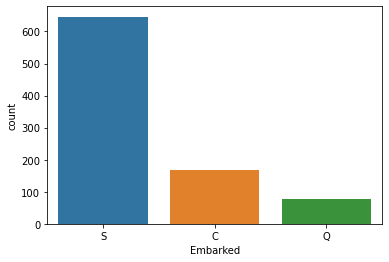

In [136]:
plt.figure()
sns.countplot(df["Embarked"])
plt.show()

<li>Many of the people are boreded from "S"</li>
<li>Aound 18% - 20% of people borded from "C"</li>
<li>Very less of the people are borded from "Q"</li>